# <center>IGR204 Data Visualization</center>

## Data Cleaning

In [1]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from math import pi
 
# Définition de paramètres 
pd.options.display.max_columns = 200
pd.options.display.max_rows = 500
sns.set()

In [2]:
data = pd.read_csv('data/SpeedDating.csv', encoding = 'latin-1', engine='python', sep=',')

In [3]:
data_women = data[data['gender'] == 0].copy()
data_men = data[data['gender'] == 1].copy()

In [4]:
print(data.shape)
print(data_women.shape)
print(data_men.shape)

(8378, 195)
(4184, 195)
(4194, 195)


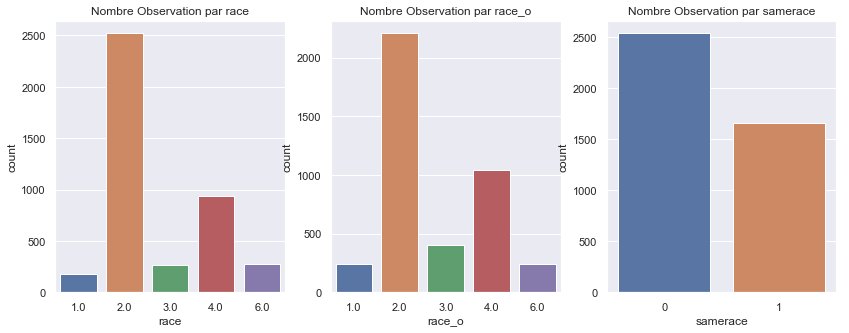

In [5]:
plt.figure(1, figsize=(14,5))
plt.subplot(131)
sns.countplot(data_men['race'])
plt.title('Nombre Observation par race')
plt.subplot(132)
sns.countplot(data_men['race_o'])
plt.title('Nombre Observation par race_o')
plt.subplot(133)
sns.countplot(data_men['samerace'])
plt.title('Nombre Observation par samerace')
plt.show()

## Création d'un dataframe avec une ligne par match

In [6]:
data

iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
5       1   1.0       0    1       1     1     10         7       NaN      6   
6       1   1.0       0    1       1     1     10         7       NaN      1   
7       1   1.0       0    1       1     1     10         7       NaN      2   
8       1   1.0       0    1       1     1     10         7       NaN      8   
9       1   1.0       0    1       1     1     10         7       NaN      9   
10      2   2.0       0    3       1     1     10         3       NaN     10   
11      2   2.0       0    3       1     1     10         3       NaN      9   
12      2   2.0       0    3       1     1     10         3       NaN      6   
13      2   2.0       0    3       1     1     10         3       NaN      1   
14      2   2.0       0    3       1     1     10         3       NaN      3   
15      2   2.0       0    3       1     1     10         3       NaN      2   
16      2   2.0       0    3       1     1     10         3       NaN      7   
17      2   2.0       0    3       1     1     10         3       NaN      8   
18      2   2.0       0    3       1     1     10         3       NaN      4   
19      2   2.0       0    3       1     1     10         3       NaN      5   
20      3   3.0       0    5       1     1     10         9       NaN      6   
21      3   3.0       0    5       1     1     10         9       NaN      5   
22      3   3.0       0    5       1     1     10         9       NaN      2   
23      3   3.0       0    5       1     1     10         9       NaN      7   
24      3   3.0       0    5       1     1     10         9       NaN      9   
25      3   3.0       0    5       1     1     10         9       NaN      8   
26      3   3.0       0    5       1     1     10         9       NaN      3   
27      3   3.0       0    5       1     1     10         9       NaN      4   
28      3   3.0       0    5       1     1     10         9       NaN     10   
29      3   3.0       0    5       1     1     10         9       NaN      1   
30      4   4.0       0    7       1     1     10         6       NaN      3   
31      4   4.0       0    7       1     1     10         6       NaN      2   
32      4   4.0       0    7       1     1     10         6       NaN      9   
33      4   4.0       0    7       1     1     10         6       NaN      4   
34      4   4.0       0    7       1     1     10         6       NaN      6   
35      4   4.0       0    7       1     1     10         6       NaN      5   
36      4   4.0       0    7       1     1     10         6       NaN     10   
37      4   4.0       0    7       1     1     10         6       NaN      1   
38      4   4.0       0    7       1     1     10         6       NaN      7   
39      4   4.0       0    7       1     1     10         6       NaN      8   
40      5   5.0       0    9       1     1     10         4       NaN      1   
41      5   5.0       0    9       1     1     10         4       NaN     10   
42      5   5.0       0    9       1     1     10         4       NaN      7   
43      5   5.0       0    9       1     1     10         4       NaN      2   
44      5   5.0       0    9       1     1     10         4       NaN      4   
45      5   5.0       0    9       1     1     10         4       NaN      3   
46      5   5.0       0    9       1     1     10         4       NaN      8   
47      5   5.0       0    9       1     1     10         4       NaN      9   
48      5   5.0       0    9       1     1     10         4       NaN      5   
49    

In [89]:
# Import data
df = pd.read_csv("data/SpeedDating.csv", encoding="Latin-1")
df_match = df[df.match == 1].copy()
df_match.dropna(subset=["race", "goal", "field", "from"], inplace=True)
df_match.reset_index(drop=True, inplace=True)
list_key_date = [str(int(df_match.loc[x, 'iid'])) + "_" + str(int(df_match.loc[x, "pid"])) + "_" + str(df_match.loc[x, "wave"]) if int(df_match.loc[x, "iid"])>int(df_match.loc[x, "pid"]) else str(int(df_match.loc[x, 'pid']))  + "_" + str(int(df_match.loc[x, "iid"])) + "_" + str(df_match.loc[x, "wave"]) for x in range(df_match.shape[0])]
df_match["key_date"] = list_key_date
# Split men/women to take attributes from the two tables
df_men = df_match[df_match.gender==1].loc[:, ["key_date", "race", "goal", "field", "from", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]].copy()
df_women = df_match[df_match.gender==0].loc[:, ["key_date", "race", "goal", "field", "from", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]].copy()
df_res = df_men.merge(df_women, how="inner", on="key_date", suffixes=('_H', '_F'))

In [90]:
df_res.shape

(675, 39)

In [91]:
df_res

key_date  race_H  goal_H                                     field_H  \
0        12_8_1     2.0     1.0                                         Law   
1        12_9_1     2.0     1.0                                         Law   
2        13_1_1     4.0     2.0                                         Law   
3        13_8_1     4.0     2.0                                         Law   
4        13_9_1     4.0     2.0                                         Law   
5       13_10_1     4.0     2.0                                         Law   
6        14_1_1     2.0     2.0                                         Law   
7        14_2_1     2.0     2.0                                         Law   
8        14_4_1     2.0     2.0                                         Law   
9        14_5_1     2.0     2.0                                         Law   
10       14_6_1     2.0     2.0                                         Law   
11       14_7_1     2.0     2.0                                         Law   
12       14_8_1     2.0     2.0                                         Law   
13       14_9_1     2.0     2.0                                         Law   
14       15_1_1     3.0     1.0                                         Law   
15       15_8_1     3.0     1.0                                         Law   
16       15_9_1     3.0     1.0                                         Law   
17       16_8_1     2.0     1.0                                    Business   
18       16_9_1     2.0     1.0                                    Business   
19       17_9_1     2.0     3.0                           political science   
20       18_8_1     2.0     1.0                                    Business   
21       19_1_1     2.0     4.0                                       money   
22       19_2_1     2.0     4.0                                       money   
23       19_4_1     2.0     4.0                                       money   
24       19_5_1     2.0     4.0                                       money   
25       19_6_1     2.0     4.0                                       money   
26       19_7_1     2.0     4.0                                       money   
27       19_8_1     2.0     4.0                                       money   
28       19_9_1     2.0     4.0                                       money   
29      19_10_1     2.0     4.0                                       money   
30       20_8_1     2.0     1.0                                     Finance   
31      43_23_2     2.0     6.0                                   Economics   
32      44_22_2     2.0     1.0                                  Psychology   
33      44_23_2     2.0     1.0                                  Psychology   
34      44_29_2     2.0     1.0                                  Psychology   
35      44_37_2     2.0     1.0                                  Psychology   
36      45_22_2     2.0     2.0                                     Finance   
37      45_23_2     2.0     2.0                                     Finance   
38      45_29_2     2.0     2.0                                     Finance   
39      45_35_2     2.0     2.0                                     Finance   
40      46_27_2     2.0     2.0                                    Finanace   
41      46_34_2     2.0     2.0                                    Finanace   
42      46_35_2     2.0     2.0                                    Finanace   
43      47_39_2     2.0     1.0                           Finance&Economics   
44      48_31_2     2.0     1.0                              Undergrad - GS   
45      49_30_2     4.0     1.0                        Mathematical Finance   
46      49_31_2     4.0     1.0                        Mathematical Finance   
47      49_34_2     4.0     1.0                        Mathematical Finance   
48      49_35_2     4.0     1.0                        Mathematical Finance   
49      49_36_2     4.0     1.0                        Ma

In [95]:
str(df_res['key_date'][0][:-1])

'12_8_1'

In [92]:
"""
Waves 6-9: Please rate the importance of the following attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important):
Waves 1-5, 10-21: You have 100 points to distribute among the following attributes -- give more points to those attributes that are more important in a potential date,
and fewer points to those attributes that are less important in a potential date. Total points must equal 100.
"""
# Normalisé: On passe toute les variables entre 0 et 1. 
# Pour les waves 1-5: on divise par 100.
df_res = df_res[(df_res['key_date'] >= 1) & ((df_res['key_date'] <= 5))].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]

# Pour les waves 6-9: on divise par 10.
df_res = df_res[(df_res['key_date'] >= 6) & ((df_res['key_date'] <= 9))].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]

# Pour les waves 10-21: on divise par 100.
df_res = df_res[(df_res['key_date'] >= 6) & ((df_res['key_date'] <= 9))].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]


'\nWaves 6-9: Please rate the importance of the following attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important):\nWaves 1-5, 10-21: You have 100 points to distribute among the following attributes -- give more points to those attributes that are more important in a potential date,\nand fewer points to those attributes that are less important in a potential date. Total points must equal 100.\n'

In [81]:
# Cas 1: un homme d'une ethnie 1(gauche) -> une femme d'une ethnie 2(droite)
# On souhaite ce que : 
# START
# ce que la femme attend     -> "attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F"
# comment l'homme est perçue -> "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H"    
# comment l'homme se voit    -> "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H"
# TARGET
# ce que la femme attend     -> "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H"
# comment l'homme est perçue -> "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F"    
# comment l'homme se voit    -> "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"
#"attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F"  
dict_match_race = {}
for race_start in df_res['race_H'].unique():
    for race_target in df_res['race_F'].unique():
        data_json = df_res[(df_res['race_H'] == race_start) &(df_res['race_F'] == race_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_race[str(race_start)+'_'+str(race_target)] = data_json

In [82]:
dict_match_goal = {}
for goal_start in df_res['goal_H'].unique():
    for goal_target in df_res['goal_F'].unique():
        data_json = df_res[(df_res['goal_H'] == goal_start) &(df_res['goal_F'] == goal_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_goal[str(goal_start)+'_'+str(goal_target)] = data_json

In [83]:
dict_match_field = {}
for field_start in df_res['field_H'].unique():
    for field_target in df_res['field_F'].unique():
        data_json = df_res[(df_res['field_H'] == field_start) &(df_res['field_F'] == field_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_field[str(field_start)+'_'+str(field_target)] = data_json

In [84]:
dict_match_from = {}
for from_start in df_res['from_H'].unique():
    for from_target in df_res['from_F'].unique():
        data_json = df_res[(df_res['from_H'] == from_start) &(df_res['from_F'] == from_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_from[str(from_start)+'_'+str(from_target)] = data_json

In [85]:
def product_json(dict_match, file_name):
    
    output = {} 
    for key in dict_match.keys():
        dict_match[key] = dict_match[key].fillna(dict_match[key].mean()).copy()
        dict_match[key] = dict_match[key].mean().copy()
        
        # START
        expected = { 'Attractive': dict_match[key]["attr1_1_F"],
                    'Sincere': dict_match[key]["sinc1_1_F"],
                    'Intelligent':dict_match[key]["intel1_1_F"],
                    'Fun': dict_match[key]["fun1_1_F"],
                    'Ambitious': dict_match[key]["amb1_1_F"]
        }

        perceive = { 'Attractive':dict_match[key]["attr5_1_H"],
                    'Sincere':dict_match[key]["sinc5_1_H"],
                    'Intelligent':dict_match[key]["intel5_1_H"],
                    'Fun':dict_match[key]["fun5_1_H"],
                    'Ambitious':dict_match[key]["amb5_1_H"]
        }

        ownView = { 'Attractive':dict_match[key]["attr3_1_H"],
                    'Sincere':dict_match[key]["sinc3_1_H"],
                    'Intelligent':dict_match[key]["intel3_1_H"],
                    'Fun':dict_match[key]["fun3_1_H"],
                    'Ambitious':dict_match[key]["amb3_1_H"]
        }
        
        # TARGET
        expected_target = { 'Attractive': dict_match[key]["attr1_1_H"],
                        'Sincere': dict_match[key]["sinc1_1_H"],
                        'Intelligent':dict_match[key]["intel1_1_H"],
                        'Fun': dict_match[key]["fun1_1_H"],
                        'Ambitious': dict_match[key]["amb1_1_H"]
        }

        perceive_target = { 'Attractive':dict_match[key]["attr5_1_F"],
                        'Sincere':dict_match[key]["sinc5_1_F"],
                        'Intelligent':dict_match[key]["intel5_1_F"],
                        'Fun':dict_match[key]["fun5_1_F"],
                        'Ambitious':dict_match[key]["amb5_1_F"]
        }

        ownView_target = { 'Attractive':dict_match[key]["attr3_1_F"],
                        'Sincere':dict_match[key]["sinc3_1_F"],
                        'Intelligent':dict_match[key]["intel3_1_F"],
                        'Fun':dict_match[key]["fun3_1_F"],
                        'Ambitious':dict_match[key]["amb3_1_F"]
        }
        
        list_expected = []
        list_perceive = []
        list_ownView = []
        
        list_expected_target = []
        list_perceive_target = []
        list_ownView_target = []
        
        for i in expected.keys():
            list_expected.append({"axis": i, "value": expected[i]})
            list_perceive.append({"axis": i, "value": perceive[i]})
            list_ownView.append({"axis": i, "value": ownView[i]})
            
            list_expected_target.append({"axis": i, "value": expected_target[i]})
            list_perceive_target.append({"axis": i, "value": perceive_target[i]})
            list_ownView_target.append({"axis": i, "value": ownView_target[i]})
        
        res = {}
        res['expected'] = list_expected
        res['perceive'] = list_perceive
        res['ownView'] = list_ownView
        
        res['expected_target'] = list_expected_target
        res['perceive_target'] = list_perceive_target
        res['ownView_target'] = list_ownView_target
        
        output[key] = res

    with open(file_name, 'w', encoding='utf-8') as outfile:
        json.dump(output, outfile, ensure_ascii=False, indent=2)

In [86]:
product_json(dict_match_race, "data_radar_race.json")
product_json(dict_match_goal, "data_radar_goal.json")
product_json(dict_match_field, "data_radar_field.json")
product_json(dict_match_from, "data_radar_from.json")